# Enunciado del Problema
Contexto:
En un centro de datos de alta eficiencia se monitorean continuamente diversos parámetros críticos para garantizar el rendimiento óptimo de los sistemas. Uno de los parámetros más relevantes es la temperatura de los servidores. Tras un análisis exhaustivo, se concluye que la temperatura de los servidores se distribuye de forma normal con una media de


μ=35 
∘
 C

y una desviación estándar de


.
σ=2.5 
∘
 C.

Consigne:
A partir de esta información, resuelva las siguientes cuestiones:

In [38]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, binom

Definimos los parámetros del problema:

μ=35 (media)

σ=2.5 (desviación estándar)

In [39]:
mu = 35       # Media
sigma = 2.5   # Desviacion estandar


## a) Gráficas de la PDF y CDF

**Problema:**  
Se requiere graficar la función de densidad de probabilidad (PDF) y la función de distribución acumulada (CDF) de la temperatura de los servidores.

**Fórmulas:**

- **Función de Densidad de Probabilidad (PDF):**

  $$
  f(x) = \frac{1}{\sigma \sqrt{2\pi}} \exp\!\left(-\frac{1}{2}\left(\frac{x-\mu}{\sigma}\right)^2\right)
  $$

- **Función de Distribución Acumulada (CDF):**

  $$
  F(x) = \Phi\!\left(\frac{x-\mu}{\sigma}\right)
  $$

donde \(\Phi\) es la CDF de la distribución normal estándar.


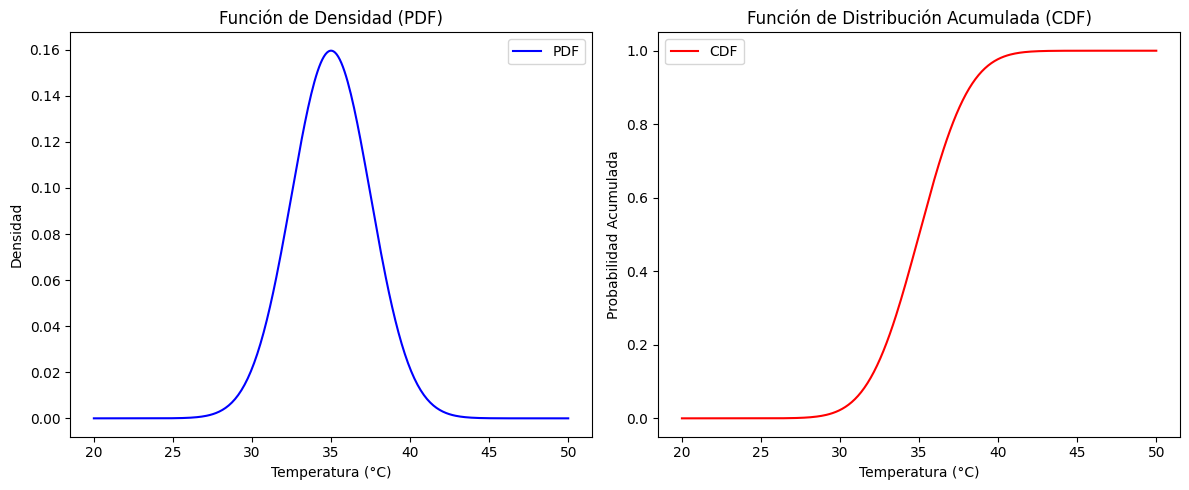

In [40]:
# Rango de valores para la temperatura (20°C a 50°C)
x_vals = np.linspace(20, 50, 300)

# Cálculo de la PDF y la CDF usando la distribución normal
pdf_vals = norm.pdf(x_vals, loc=mu, scale=sigma)
cdf_vals = norm.cdf(x_vals, loc=mu, scale=sigma)

# Generar gráficos en dos subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Gráfico de la PDF
axes[0].plot(x_vals, pdf_vals, color='blue', label='PDF')
axes[0].set_title("Función de Densidad (PDF)")
axes[0].set_xlabel("Temperatura (°C)")
axes[0].set_ylabel("Densidad")
axes[0].legend()

# Gráfico de la CDF
axes[1].plot(x_vals, cdf_vals, color='red', label='CDF')
axes[1].set_title("Función de Distribución Acumulada (CDF)")
axes[1].set_xlabel("Temperatura (°C)")
axes[1].set_ylabel("Probabilidad Acumulada")
axes[1].legend()

plt.tight_layout()
plt.show()


## a) Gráficas de la PDF y CDF

**Problema:**  
Se requiere graficar la función de densidad de probabilidad (PDF) y la función de distribución acumulada (CDF) de la temperatura de los servidores.

**Fórmulas:**

- **Función de Densidad de Probabilidad (PDF):**

  $$
  f(x) = \frac{1}{\sigma \sqrt{2\pi}} \exp\!\left(-\frac{1}{2}\left(\frac{x-\mu}{\sigma}\right)^2\right)
  $$

- **Función de Distribución Acumulada (CDF):**

  $$
  F(x) = \Phi\!\left(\frac{x-\mu}{\sigma}\right)
  $$

donde \(\Phi\) es la CDF de la distribución normal estándar.


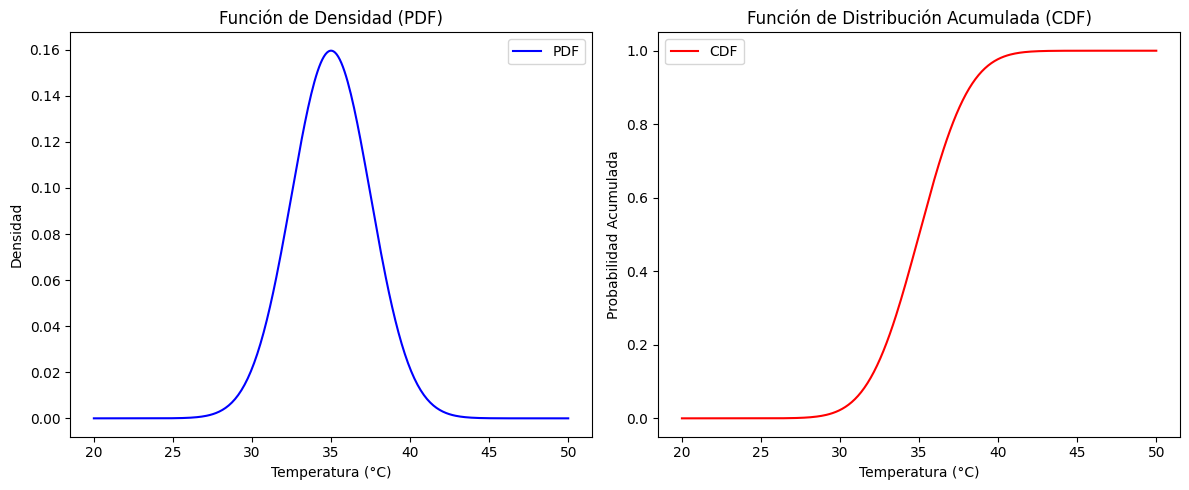

In [41]:
# Rango de valores para la temperatura (20°C a 50°C)
x_vals = np.linspace(20, 50, 300)

# Cálculo de la PDF y la CDF usando la distribución normal
pdf_vals = norm.pdf(x_vals, loc=mu, scale=sigma)
cdf_vals = norm.cdf(x_vals, loc=mu, scale=sigma)

# Generar gráficos en dos subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Gráfico de la PDF
axes[0].plot(x_vals, pdf_vals, color='blue', label='PDF')
axes[0].set_title("Función de Densidad (PDF)")
axes[0].set_xlabel("Temperatura (°C)")
axes[0].set_ylabel("Densidad")
axes[0].legend()

# Gráfico de la CDF
axes[1].plot(x_vals, cdf_vals, color='red', label='CDF')
axes[1].set_title("Función de Distribución Acumulada (CDF)")
axes[1].set_xlabel("Temperatura (°C)")
axes[1].set_ylabel("Probabilidad Acumulada")
axes[1].legend()

plt.tight_layout()
plt.show()


## b) Probabilidad de que el sistema de enfriamiento se active

**Problema:**  
El sistema de enfriamiento se activa cuando la temperatura supera los \(40\,^\circ\text{C}\). Calcular la probabilidad de que, para un servidor seleccionado al azar, la temperatura sea mayor a 40°C.

**Fórmula:**

$$
P(X > 40) = 1 - F(40)
$$

donde \(F(40)\) es la CDF evaluada en 40°C.


In [42]:
# Cálculo de P(T > 40°C)
p_mas_40 = 1 - norm.cdf(40, loc=mu, scale=sigma)
print("P(T > 40°C) =", p_mas_40)


P(T > 40°C) = 0.02275013194817921


## c) Porcentaje de tiempo con temperatura entre 30°C y 38°C

**Problema:**  
Se sabe que los servidores operan de manera óptima cuando la temperatura está entre 30°C y 38°C. Calcular el porcentaje de tiempo que la temperatura se encuentra en este rango.

**Fórmula:**

$$
P(30 \le X \le 38) = F(38) - F(30)
$$


In [43]:
# Probabilidad de que la temperatura esté entre 30°C y 38°C
p_30_38 = norm.cdf(38, loc=mu, scale=sigma) - norm.cdf(30, loc=mu, scale=sigma)
print("P(30°C ≤ T ≤ 38°C) =", p_30_38, "(", p_30_38*100, "% )")


P(30°C ≤ T ≤ 38°C) = 0.8621801978301126 ( 86.21801978301126 % )


## d) Umbral de alerta temprana (Percentil 90)

**Problema:**  
Determinar la temperatura \(T\) en la que se active una alerta temprana, de modo que el 90% de las mediciones sean menores a \(T\) (percentil 90).

**Fórmula:**

$$
T = \mu + \sigma \, z_{0.90}
$$

donde \(z_{0.90}\) es el valor cuantil 0.90 de la distribución normal estándar. En Python, esto se obtiene usando la función `ppf`.


In [44]:
# Cálculo del percentil 90
umbral_90 = norm.ppf(0.90, loc=mu, scale=sigma)
print("Umbral del percentil 90 =", umbral_90, "°C")


Umbral del percentil 90 = 38.2038789138615 °C


## e) Probabilidad de que el promedio de 5 servidores supere 37°C

**Problema:**  
Se registra el promedio de la temperatura de 5 servidores seleccionados al azar. Calcular la probabilidad de que este promedio supere \(37\,^\circ\text{C}\).

**Fórmulas:**

Si \(\overline{X}\) es la media de 5 mediciones, se tiene:

$$
\overline{X} \sim N\!\left(\mu, \frac{\sigma^2}{5}\right)
$$

y la desviación estándar del promedio es:

$$
\sigma_{\overline{X}} = \frac{\sigma}{\sqrt{5}}
$$

La probabilidad requerida es:

$$
P(\overline{X} > 37) = 1 - F_{\overline{X}}(37)
$$


In [45]:
# Desviación estándar del promedio de 5 servidores
sigma_prom = sigma / np.sqrt(5)

# Probabilidad de que el promedio supere 37°C
p_promedio_37 = 1 - norm.cdf(37, loc=mu, scale=sigma_prom)
print("P(promedio de 5 servidores > 37°C) =", p_promedio_37)


P(promedio de 5 servidores > 37°C) = 0.03681913506015133


## f) Probabilidad de que, en un instante, más de 25 servidores tengan T > 41°C

**Problema:**  
Considerando que en el centro de datos hay 1000 servidores, calcular la probabilidad de que más de 25 servidores tengan una temperatura superior a \(41\,^\circ\text{C}\).

**Fórmulas:**

Primero, se obtiene:

$$
p = P(X > 41) = 1 - F(41)
$$

Luego, si \(Y \sim \text{Binomial}(n = 1000, p)\), se desea calcular:

$$
P(Y > 25) = 1 - \text{binom.cdf}(25, 1000, p)
$$


In [46]:
# Probabilidad de que un servidor tenga T > 41°C
p_mas_41 = 1 - norm.cdf(41, loc=mu, scale=sigma)

# Probabilidad de que más de 25 de 1000 servidores tengan T > 41°C
p_mas_25 = 1 - binom.cdf(25, 1000, p_mas_41)

print("p (un servidor T > 41°C) =", p_mas_41)
print("P(más de 25 servidores con T > 41°C) =", p_mas_25)


p (un servidor T > 41°C) = 0.008197535924596155
P(más de 25 servidores con T > 41°C) = 4.753291588110997e-07


## g) Temperatura máxima que debe soportar el sistema

**Problema:**  
Determinar la temperatura \(T_{\text{max}}\) que el sistema de enfriamiento debe soportar, tal que el 99.9% de los eventos de temperatura estén por debajo de este valor.

**Fórmula:**

$$
T_{\text{max}} = \mu + \sigma \, z_{0.999}
$$

donde \(z_{0.999}\) es el valor cuantil 0.999 de la distribución normal estándar.


In [47]:
# Cálculo del percentil 99.9
T_max_999 = norm.ppf(0.999, loc=mu, scale=sigma)
print("T para cubrir 99.9% de los eventos =", T_max_999, "°C")


T para cubrir 99.9% de los eventos = 42.72558076541954 °C


## h) Cuartiles y Estrategia de Enfriamiento Variable

**Problema:**  
Calcular los cuartiles de la distribución de la temperatura y proponer una estrategia de enfriamiento variable en cuatro niveles basados en estos cuartiles.

**Fórmulas:**

- **Primer Cuartil (Q₁):**
  
  $$
  Q_1 = \mu + \sigma \, z_{0.25}
  $$
  
- **Mediana (Q₂):**
  
  $$
  Q_2 = \mu + \sigma \, z_{0.50} = \mu
  $$
  
- **Tercer Cuartil (Q₃):**
  
  $$
  Q_3 = \mu + \sigma \, z_{0.75}
  $$
  
Donde:
- \(z_{0.25} \approx -0.6745\)
- \(z_{0.50} = 0\)
- \(z_{0.75} \approx 0.6745\)

**Estrategia de Enfriamiento:**
- **Baja:** \(T < Q_1\)  
- **Moderada:** \(Q_1 \le T < Q_2\)  
- **Alta:** \(Q_2 \le T < Q_3\)  
- **Crítica:** \(T \ge Q_3\)


In [48]:
# Cálculo de los cuartiles
Q1 = norm.ppf(0.25, loc=mu, scale=sigma)
Q2 = norm.ppf(0.50, loc=mu, scale=sigma)
Q3 = norm.ppf(0.75, loc=mu, scale=sigma)

print("Cuartiles:")
print("Q1 =", Q1, "°C")
print("Q2 =", Q2, "°C")
print("Q3 =", Q3, "°C")


Cuartiles:
Q1 = 33.313775624509795 °C
Q2 = 35.0 °C
Q3 = 36.686224375490205 °C


## Resumen de Resultados

A continuación se listan los resultados obtenidos para cada apartado:

- **a)** Las gráficas de la PDF y CDF se muestran en los gráficos anteriores.
- **b)** \(P(T > 40\,^\circ\text{C}) \approx\) *resultado*.
- **c)** \(P(30\,^\circ\text{C} \le T \le 38\,^\circ\text{C}) \approx\) *resultado* (en %).
- **d)** Umbral del percentil 90 \(T \approx\) *resultado* °C.
- **e)** \(P(\text{promedio de 5 servidores} > 37\,^\circ\text{C}) \approx\) *resultado*.
- **f)** \(P(\text{más de 25 de 1000 servidores con } T > 41\,^\circ\text{C}) \approx\) *resultado*.
- **g)** \(T\) para cubrir el 99.9% de los eventos \(\approx\) *resultado* °C.
- **h)**  
  - \(Q_1 \approx\) *resultado* °C  
  - \(Q_2 \approx\) *resultado* °C  
  - \(Q_3 \approx\) *resultado* °C  
  La estrategia de enfriamiento se define en función de estos cuartiles.


In [49]:
print("RESUMEN DE RESULTADOS:")
print("a) Las gráficas de PDF y CDF se muestran arriba.")
print("b) P(T > 40°C)      =", p_mas_40)
print("c) P(30°C ≤ T ≤ 38°C) =", p_30_38, "(", p_30_38*100, "% )")
print("d) Umbral (percentil 90) =", umbral_90, "°C")
print("e) P(promedio de 5 servidores > 37°C) =", p_promedio_37)
print("f) p (un servidor T > 41°C) =", p_mas_41)
print("   P(más de 25 servidores T > 41°C) =", p_mas_25)
print("g) T para cubrir 99.9% de los eventos =", T_max_999, "°C")
print("h) Cuartiles: Q1 =", Q1, "°C, Q2 =", Q2, "°C, Q3 =", Q3, "°C")


RESUMEN DE RESULTADOS:
a) Las gráficas de PDF y CDF se muestran arriba.
b) P(T > 40°C)      = 0.02275013194817921
c) P(30°C ≤ T ≤ 38°C) = 0.8621801978301126 ( 86.21801978301126 % )
d) Umbral (percentil 90) = 38.2038789138615 °C
e) P(promedio de 5 servidores > 37°C) = 0.03681913506015133
f) p (un servidor T > 41°C) = 0.008197535924596155
   P(más de 25 servidores T > 41°C) = 4.753291588110997e-07
g) T para cubrir 99.9% de los eventos = 42.72558076541954 °C
h) Cuartiles: Q1 = 33.313775624509795 °C, Q2 = 35.0 °C, Q3 = 36.686224375490205 °C
